In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [290]:
# Example: Loading a CSV file
data = pd.read_csv('/content/supersore.csv')


In [291]:
# Check for missing values
print(data.isnull().sum())




Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [292]:
# Function to generate a random 5-digit number
def random_5_digit():
    return str(np.random.randint(10000, 99999))

# Fill missing values with random 5-digit numbers
data['Postal Code'] = data['Postal Code'].apply(lambda x: random_5_digit() if x == 'None' else x)

In [293]:

data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [294]:
print(data['Postal Code'])

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64


In [295]:
# Create DataFrame
df = pd.DataFrame(data)

# Function to standardize date format
def standardize_date_format(date):
    return pd.to_datetime(date).strftime('%m/%d/%Y')

# Apply the function to the 'Order Date' column
df['Order Date'] = df['Order Date'].apply(standardize_date_format)

In [296]:
print(data['Order Date'])

0         7/31/2012
1          2/5/2013
2        10/17/2013
3         1/28/2013
4         11/5/2013
            ...    
51285     6/19/2014
51286     6/20/2014
51287     12/2/2013
51288     2/18/2012
51289     5/22/2012
Name: Order Date, Length: 51290, dtype: object


In [297]:
# Function to standardize date format
def standardize_date_format(date):
    return pd.to_datetime(date).strftime('%m/%d/%Y')

# Apply the function to the 'Order Date' column
df['Ship Date'] = df['Ship Date'].apply(standardize_date_format)

In [298]:
print(data['Ship Date'])

0         7/31/2012
1          2/7/2013
2        10/18/2013
3         1/30/2013
4         11/6/2013
            ...    
51285     6/19/2014
51286     6/24/2014
51287     12/2/2013
51288     2/22/2012
51289     5/26/2012
Name: Ship Date, Length: 51290, dtype: object


In [299]:
data

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891   7/31/2012   7/31/2012        Same Day   
1       26341    IN-2013-77878    2/5/2013    2/7/2013    Second Class   
2       25330    IN-2013-71249  10/17/2013  10/18/2013     First Class   
3       13524  ES-2013-1579342   1/28/2013   1/30/2013     First Class   
4       47221     SG-2013-4320   11/5/2013   11/6/2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366   6/19/2014   6/19/2014        Same Day   
51286   35398   US-2014-102288   6/20/2014   6/24/2014  Standard Class   
51287   40470   US-2013-155768   12/2/2013   12/2/2013        Same Day   
51288    9596   MX-2012-140767   2/18/2012   2/22/2012  Standard Class   
51289    6147   MX-2012-134460   5/22/2012   5/26/2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        S‹o Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845         933.57        Critical  
1          0.1 -288.7650         923.63        Critical  
2          0.1  919.9710         915.49          Medium  
3          0.1  -96.5400         910.16          Medium  
4          0.0  311.5200         903.04        Critical  
...        ...       ...            ...             ...  
51285    

In [300]:
data.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID'], inplace=True)


In [301]:
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [302]:
# Create new feature for shipping duration
data['Shipping Duration'] = (data['Ship Date'] - data['Order Date']).dt.days

In [303]:
data

Order Date  Ship Date       Ship Mode      Segment           City  \
0     2012-07-31 2012-07-31        Same Day     Consumer  New York City   
1     2013-02-05 2013-02-07    Second Class    Corporate     Wollongong   
2     2013-10-17 2013-10-18     First Class     Consumer       Brisbane   
3     2013-01-28 2013-01-30     First Class  Home Office         Berlin   
4     2013-11-05 2013-11-06        Same Day     Consumer          Dakar   
...          ...        ...             ...          ...            ...   
51285 2014-06-19 2014-06-19        Same Day    Corporate           Kure   
51286 2014-06-20 2014-06-24  Standard Class     Consumer        Houston   
51287 2013-12-02 2013-12-02        Same Day  Home Office         Oxnard   
51288 2012-02-18 2012-02-22  Standard Class  Home Office       Valinhos   
51289 2012-05-22 2012-05-26    Second Class     Consumer       Tipitapa   

                 State        Country  Postal Code  Market      Region  \
0             New York  United States      10024.0      US        East   
1      New South Wales      Australia          NaN    APAC     Oceania   
2           Queensland      Australia          NaN    APAC     Oceania   
3               Berlin        Germany          NaN      EU     Central   
4                Dakar        Senegal          NaN  Africa      Africa   
...                ...            ...          ...     ...         ...   
51285        Hiroshima          Japan          NaN    APAC  North Asia   
51286            Texas  United States      77095.0      US     Central   
51287       California  United States      93030.0      US        West   
51288        S‹o Paulo         Brazil          NaN   LATAM       South   
51289          Managua      Nicaragua          NaN   LATAM     Central   

              Category Sub-Category  \
0           Technology  Accessories   
1            Furniture       Chairs   
2           Technology       Phones   
3           Technology       Phones   
4           Technology      Copiers   
...                ...          ...   
51285  Office Supplies    Fasteners   
51286  Office Supplies   Appliances   
51287  Office Supplies    Envelopes   
51288  Office Supplies      Binders   
51289  Office Supplies        Paper   

                                            Product Name     Sales  Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650         7   
1              Novimex Executive Leather Armchair, Black  3709.395         9   
2                      Nokia Smart Phone, with Caller ID  5175.171         9   
3                         Motorola Smart Phone, Cordless  2892.510         5   
4                         Sharp Wireless Fax, High-Speed  2832.960         8   
...                                                  ...       ...       ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100         5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444         1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920         3   
51288                            Acco Index Tab, Economy    13.440         2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380         3   

       Discount    Profit  Shipping Cost Order Priority  Shipping Duration  
0           0.0  762.1845         933.57       Critical                  0  
1           0.1 -288.7650         923.63       Critical                  2  
2           0.1  919.9710         915.49         Medium                  1  
3           0.1  -96.5400         910.16         Medium                  2  
4           0.0  311.5200         903.04       Critical                  1  
...         ...       ...            ...            ...                ...  
51285       0.0    4.5000           0.01         Medium                  0  
51286       0.8   -1.1100           0.01         Medium                  4  
51287       0.0   11.2308           0.01           High                  0  
51288       0.0 

In [304]:
# Encode categorical variables using one-hot encoding
categorical_columns = [ 'Segment', 'City', 'State', 'Country', 'Market']
data = pd.get_dummies(data, columns=categorical_columns)

In [305]:
# Standardize numerical columns
scaler = StandardScaler()
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [306]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [307]:
# Extract features from dates
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day

In [308]:
# Remove outliers using IQR method for 'Sales'
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Sales'] < (Q1 - 1.5 * IQR)) | (data['Sales'] > (Q3 + 1.5 * IQR)))]

In [309]:
# Log transformation to reduce skewness
data['Sales'] = np.log1p(data['Sales'])

<ipython-input-309-cf8bb06f9153>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'] = np.log1p(data['Sales'])


In [310]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from imblearn.over_sampling import SMOTE
import string
# Robust scaling
scaler = RobustScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


<ipython-input-310-161e07ae03d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [311]:
# Preprocess text data in 'Product Name'
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stop words
    return text

data['Product Name'] = data['Product Name'].apply(preprocess_text)


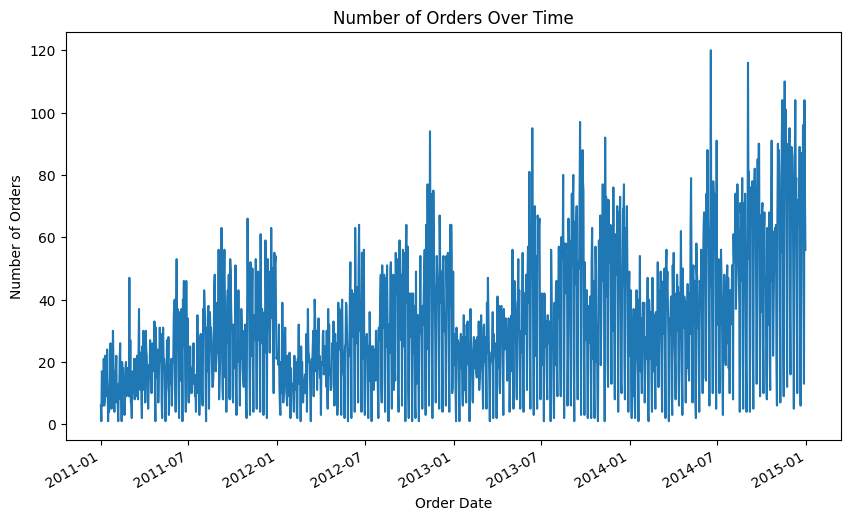

In [312]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

plt.figure(figsize=(10, 6))
data.groupby('Order Date').size().plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.show()

This line plot shows the trend of the number of orders over time. Peaks may indicate high demand periods, while troughs could indicate low demand periods.


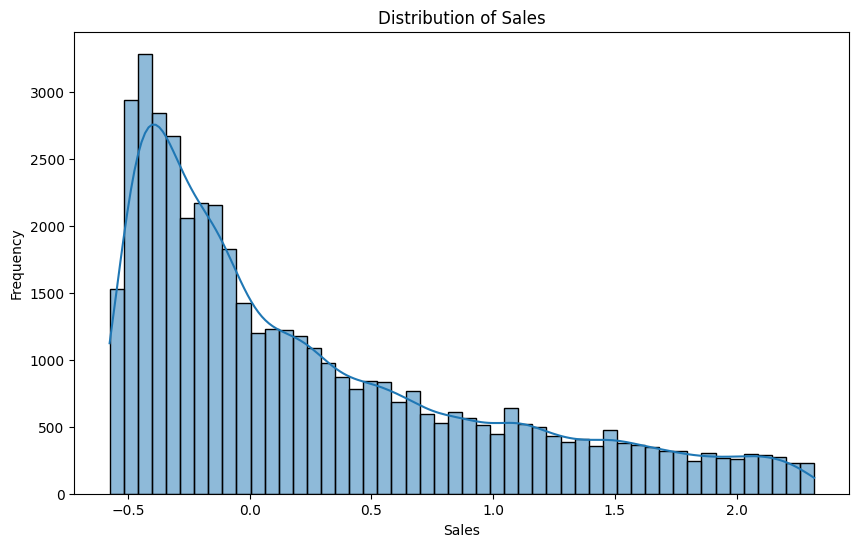

In [313]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of sales amounts. It helps identify whether sales are normally distributed or skewed, and highlights any outliers.



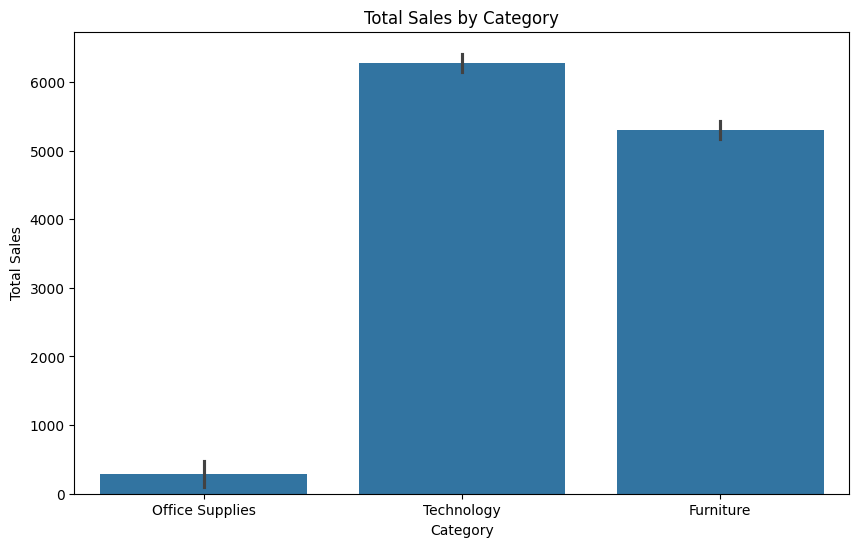

In [314]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


The bar plot highlights which categories contribute the most to sales. This can inform inventory and marketing strategies.

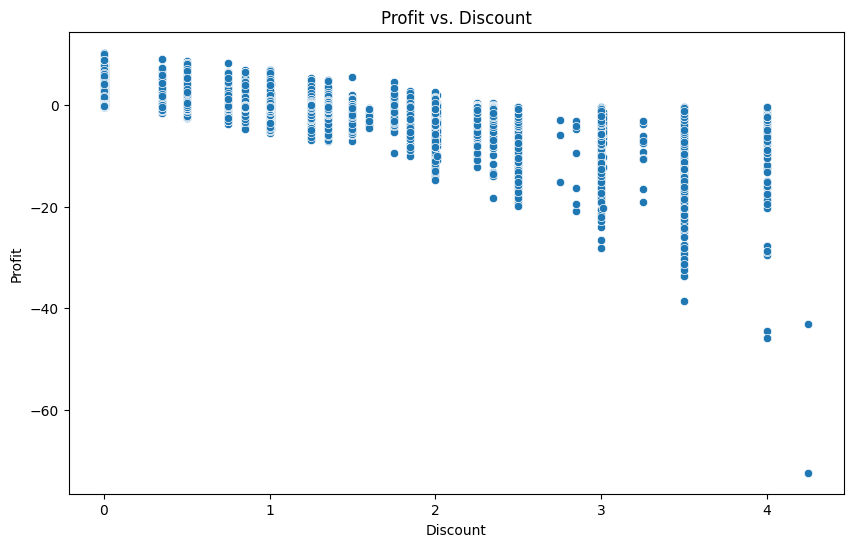

In [315]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=data)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


The scatter plot reveals the relationship between discounts and profit. It can help determine if higher discounts lead to lower profits or vice versa.

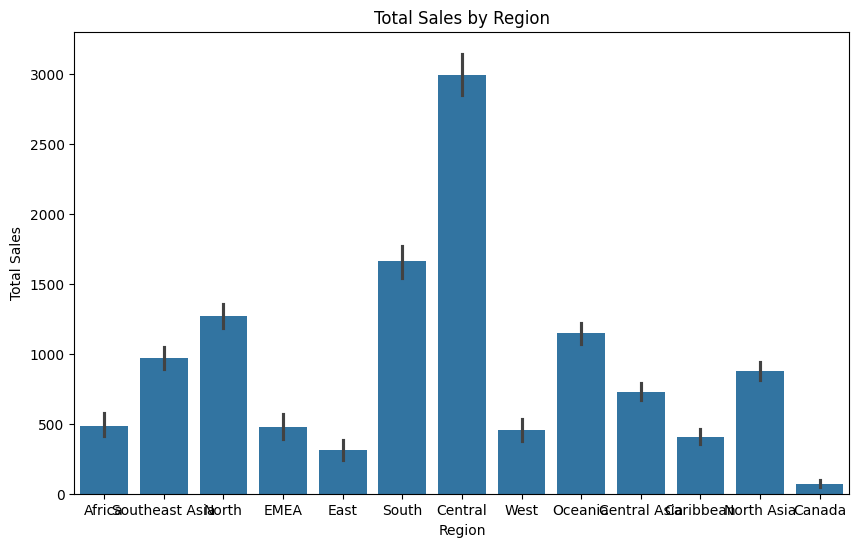

In [316]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


The bar plot highlights which regions contribute the most to sales. This can guide regional marketing strategies and resource allocation.

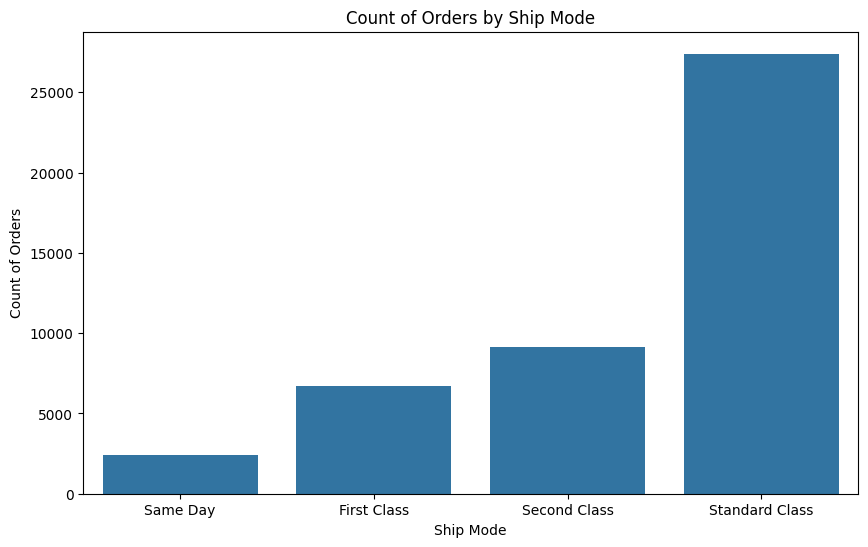

In [317]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode', data=data)
plt.title('Count of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count of Orders')
plt.show()


The count plot shows the frequency of each shipping mode used in orders. This can help in understanding customer preferences and logistics planning


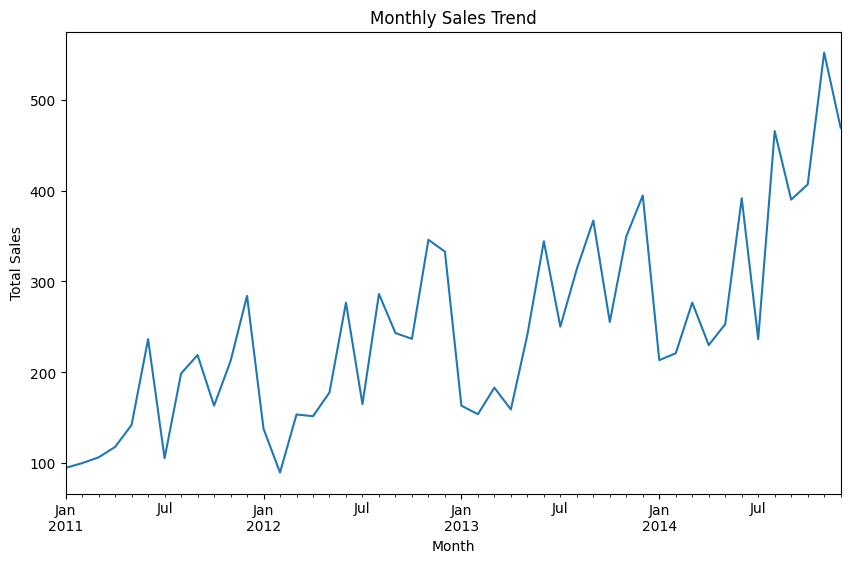

In [318]:
data['Order Month'] = data['Order Date'].dt.to_period('M')

plt.figure(figsize=(10, 6))
data.groupby('Order Month')['Sales'].sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


The line plot shows the trend in sales on a monthly basis. This helps identify seasonal patterns and forecast future sales.

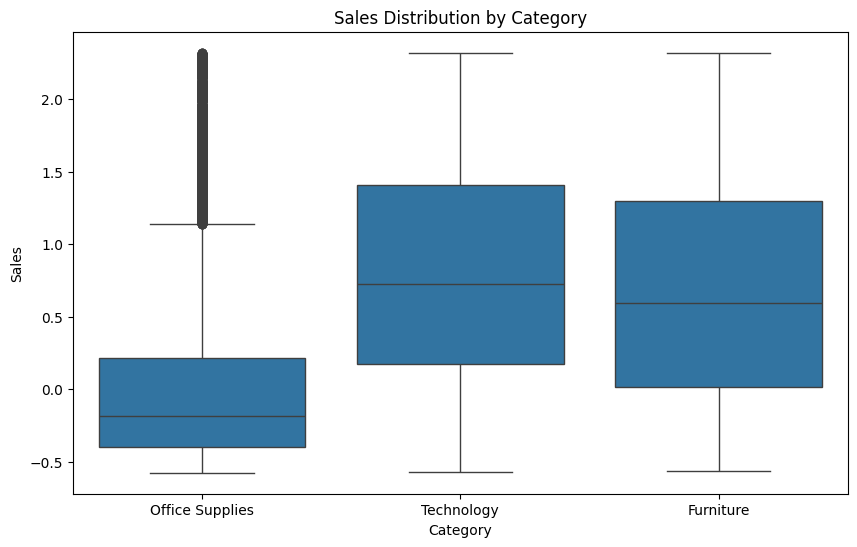

In [319]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


The box plot shows the distribution of sales within each category. Categories with wider boxes have more variability in sales. Outliers are indicated by points outside the whiskers. This helps identify which categories have more consistent sales and which have more variability.

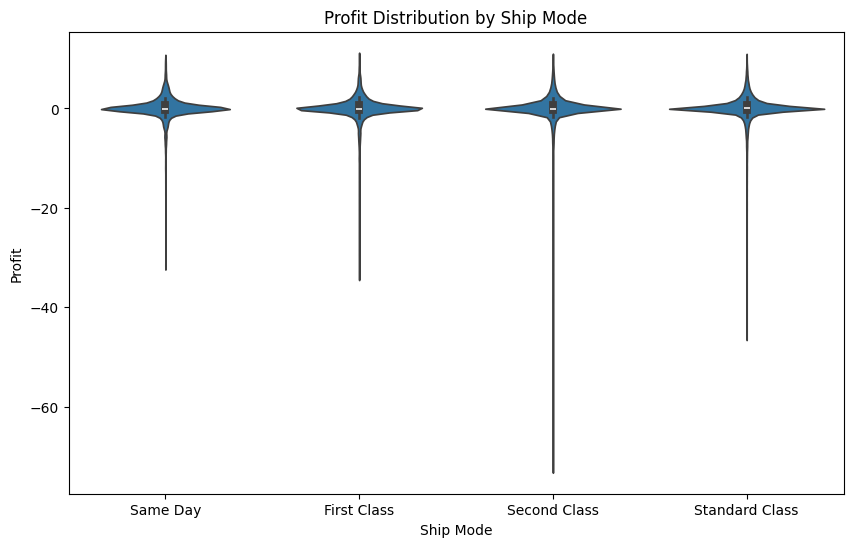

In [320]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Ship Mode', y='Profit', data=data)
plt.title('Profit Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.show()


The violin plot shows the density and distribution of profits for each shipping mode. It provides insights into the range of profits and where most data points are concentrated within each shipping mode

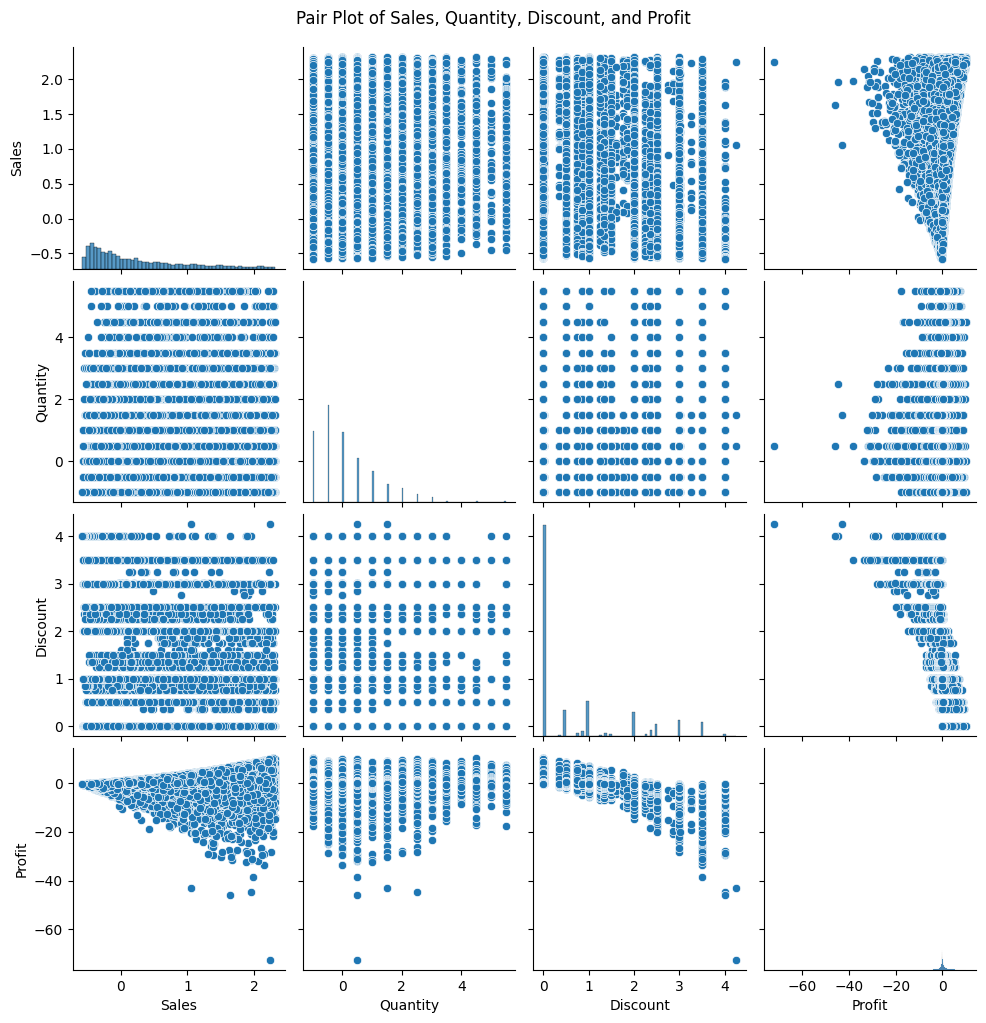

In [321]:
sns.pairplot(data[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.suptitle('Pair Plot of Sales, Quantity, Discount, and Profit', y=1.02)
plt.show()


In [322]:
data['Order Month'] = data['Order Date'].dt.to_period('M')
sales_pivot = data.pivot_table(values='Sales', index='Order Month', columns='Region', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Heatmap of Sales by Month and Region')
plt.xlabel('Region')
plt.ylabel('Order Month')
plt.show()


 The heatmap shows the intensity of sales across different months and regions. It helps identify seasonal trends and regional sales performance. Darker colors indicate higher sales, and patterns can reveal peak sales periods and underperforming regions.

In [323]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Shipping Cost'], bins=50, kde=True)
plt.title('Distribution of Shipping Cost')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.show()


The distribution plot shows how shipping costs are distributed across all orders. It helps identify common shipping cost ranges and outliers. A right-skewed distribution may indicate that most shipping costs are low, with a few high-cost outliers.
